<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Data-properties" data-toc-modified-id="Data-properties-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data properties</a></span></li><li><span><a href="#Number-of-pictures-per-species-in-train-set" data-toc-modified-id="Number-of-pictures-per-species-in-train-set-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Number of pictures per species in train set</a></span></li><li><span><a href="#Showing-3-pictures-of-each-of-the-first-four-species" data-toc-modified-id="Showing-3-pictures-of-each-of-the-first-four-species-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Showing 3 pictures of each of the first four species</a></span></li></ul></li><li><span><a href="#Modelling-20-species" data-toc-modified-id="Modelling-20-species-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling 20 species</a></span><ul class="toc-item"><li><span><a href="#Get-data-for-20-species-only" data-toc-modified-id="Get-data-for-20-species-only-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Get data for 20 species only</a></span></li><li><span><a href="#Naive-Bayes-model" data-toc-modified-id="Naive-Bayes-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Naive Bayes model</a></span></li><li><span><a href="#Decision-Tree-model" data-toc-modified-id="Decision-Tree-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Decision Tree model</a></span><ul class="toc-item"><li><span><a href="#Let's-make-a-grid-search" data-toc-modified-id="Let's-make-a-grid-search-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Let's make a grid search</a></span></li></ul></li></ul></li><li><span><a href="#Building-a-simple-CNN" data-toc-modified-id="Building-a-simple-CNN-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Building a simple CNN</a></span><ul class="toc-item"><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Preparing the data</a></span><ul class="toc-item"><li><span><a href="#convert-categories-to-numeric" data-toc-modified-id="convert-categories-to-numeric-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>convert categories to numeric</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Normalization</a></span></li></ul></li><li><span><a href="#Building-the-network" data-toc-modified-id="Building-the-network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Building the network</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw


from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Get the data

In [2]:
def import_pics(base_path):
    all_pics = list()
    all_labels = list()
    for species in os.listdir(base_path):
        for tmp_pic in os.listdir(base_path+species):
            all_labels.append(species)
            all_pics.append(np.array(Image.open(base_path+species+"/"+tmp_pic)))
    return np.array(all_pics), np.array(all_labels)

In [3]:
base_path = r'data/200_species_train/'
X_train, y_train = import_pics(base_path)

In [4]:
len(X_train), len(y_train)

(27503, 27503)

In [5]:
base_path = r'data/200_species_valid/'
X_val, y_val = import_pics(base_path)

In [8]:
len(X_val), len(y_val)

(1000, 1000)

In [9]:
base_path = r'data/200_species_test/'
X_test, y_test = import_pics(base_path)

In [10]:
len(X_test), len(y_test)

(1000, 1000)

# EDA

## Data properties

In [11]:
X_train.shape

print(f"The train data contains {X_train.shape[0]} pictures.")
print(f"The validation data contains {X_val.shape[0]} pictures.")
print(f"The test data contains {X_test.shape[0]} pictures.")
print(f"\nEach picture is {X_test.shape[1]}X{X_test.shape[2]} pixels with {X_test.shape[3]} channels.")

The train data contains 27503 pictures.
The validation data contains 1000 pictures.
The test data contains 1000 pictures.

Each picture is 224X224 pixels with 3 channels.


## Number of pictures per species in train set

In [18]:
birds_counts.max()

0    YELLOW HEADED BLACKBIRD
1                        300
dtype: object

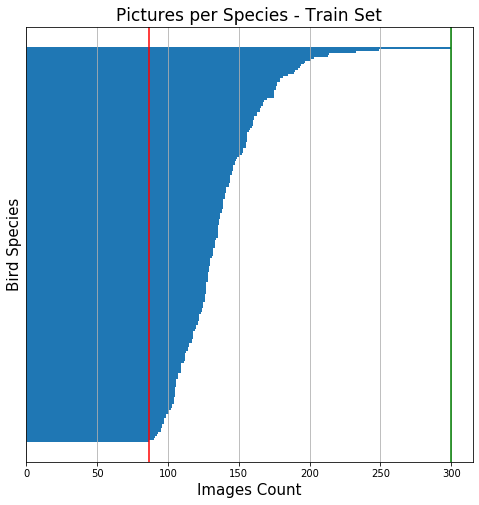

In [34]:
plt.figure(figsize=(8,8))
birds_counts = pd.DataFrame(np.unique(y_train,return_counts=True)).T.sort_values(by=1)
plt.barh(birds_counts[0], birds_counts[1], height=1);
plt.axvline(birds_counts.min()[1], c="red")
plt.axvline(birds_counts.max()[1], c="green")
plt.yticks([]);
plt.ylabel("Bird Species", fontsize=15)
plt.xlabel("Images Count", fontsize=15)
plt.title("Pictures per Species - Train Set", fontsize=17)
plt.grid();

Each species have exactly 5 pictures in the validation and the test set.

In [13]:
all(pd.Series(y_val).value_counts() == 5)

True

In [14]:
all(pd.Series(y_test).value_counts() == 5)

True

## Showing 3 pictures of each of the first four species

In [35]:
all_species = np.unique(y_train)

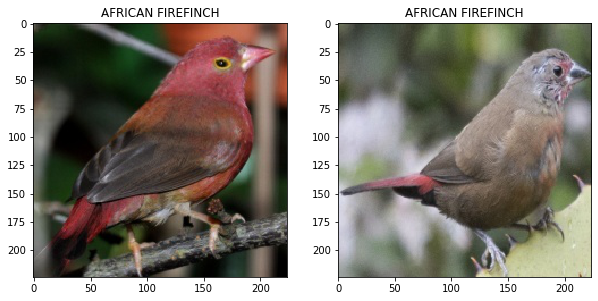

In [98]:
f, ax = plt.subplots(1,2,figsize=(10,20))
ax[0].imshow(X_train[8])
ax[0].set_title(y_train[0])
ax[1].imshow(X_train[14])
ax[1].set_title(y_train[1]);

Already I see an issue here. The second picture looks kind of skweshed. How can we identify those, and should we filter them out?

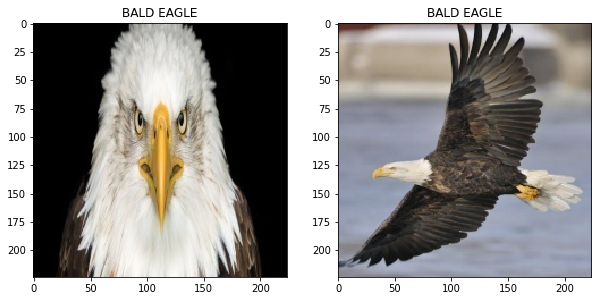

In [107]:
inds = np.where(y_train == all_species[14])[0]

f, ax = plt.subplots(1,2,figsize=(10,20))
ax[0].imshow(X_train[inds[92]])
ax[0].set_title(y_train[inds[92]])
ax[1].imshow(X_train[inds[14]])
ax[1].set_title(y_train[inds[14]]);

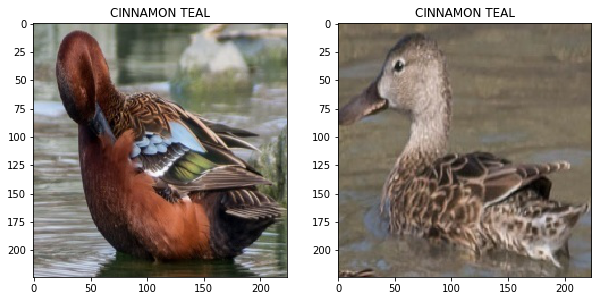

In [86]:
inds = np.where(y_train == all_species[50])[0]

f, ax = plt.subplots(1,2,figsize=(10,20))
ax[0].imshow(X_train[inds[19]])
ax[0].set_title(y_train[inds[19]])
ax[1].imshow(X_train[inds[14]])
ax[1].set_title(y_train[inds[14]]);

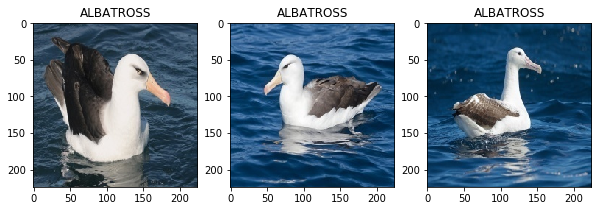

In [17]:
inds = np.where(y_train == all_species[1])[0]

f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[inds[0]])
ax[0].set_title(y_train[inds[0]])
ax[1].imshow(X_train[inds[1]])
ax[1].set_title(y_train[inds[0]])
ax[2].imshow(X_train[inds[2]]);
ax[2].set_title(y_train[inds[0]]);

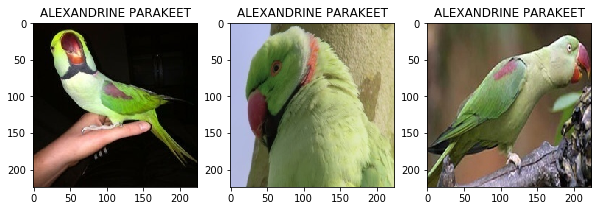

In [18]:
inds = np.where(y_train == all_species[2])[0]

f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[inds[0]])
ax[0].set_title(y_train[inds[0]])
ax[1].imshow(X_train[inds[1]])
ax[1].set_title(y_train[inds[1]])
ax[2].imshow(X_train[inds[2]]);
ax[2].set_title(y_train[inds[2]]);

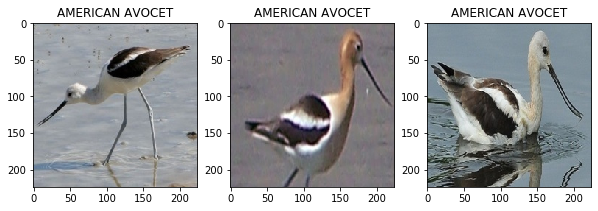

In [19]:
inds = np.where(y_train == all_species[3])[0]

f, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(X_train[inds[0]])
ax[0].set_title(y_train[inds[0]])
ax[1].imshow(X_train[inds[1]])
ax[1].set_title(y_train[inds[1]])
ax[2].imshow(X_train[inds[2]]);
ax[2].set_title(y_train[inds[2]]);

# Modelling 20 species

We only use 20 species from now on as working with all 200 is too complicated and time consuming for now.

In [20]:
chosen_species = ['AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', \
                  'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', \
                  'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD', \
                  'ARARIPE MANAKIN', 'BALD EAGLE', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAR-TAILED GODWIT', \
                  'BARN OWL', 'BARN SWALLOW']

## Get data for 20 species only

In [21]:
inds_20_species = [i for i in range(len(y_train)) if y_train[i] in chosen_species]

In [22]:
print(f"This is a total of {len(inds_20_species)} pictures")

This is a total of 2799 pictures


In [23]:
sub_X_train = X_train[inds_20_species]
print(sub_X_train.shape)
sub_y_train = y_train[inds_20_species]
pd.Series(sub_y_train).value_counts()

(2799, 224, 224, 3)


AMERICAN AVOCET         179
AMERICAN PIPIT          179
AMERICAN BITTERN        170
ALEXANDRINE PARAKEET    165
BALD EAGLE              160
AMERICAN COOT           158
ANTBIRD                 150
ANHINGA                 147
AFRICAN FIREFINCH       140
AMERICAN REDSTART       139
ANNAS HUMMINGBIRD       139
BALTIMORE ORIOLE        137
AMERICAN GOLDFINCH      133
BARN SWALLOW            132
AMERICAN KESTREL        130
BARN OWL                119
BAR-TAILED GODWIT       114
BANANAQUIT              106
ARARIPE MANAKIN         105
ALBATROSS                97
dtype: int64

In [24]:
sum_X_val = X_val[:5*20]
sub_y_val = y_val[:5*20]

Flatten the pictures data for simple models

In [25]:
sub_X_train_flat = np.array([x.flatten() for x in sub_X_train])
sub_X_val_flat = np.array([x.flatten() for x in sum_X_val])

In [26]:
print(f"The pictures are flattened so that each picture is {sub_X_train_flat.shape[1]} features.")
print("Dimensions of the flattened train data", sub_X_train_flat.shape)
print("Dimensions of the flattened validation data", sub_X_val_flat.shape)

The pictures are flattened so that each picture is 150528 features.
Dimensions of the flattened train data (2799, 150528)
Dimensions of the flattened validation data (100, 150528)


## Naive Bayes model

In [27]:
nbc = BernoulliNB(binarize=0)
nbc.fit(sub_X_train_flat,sub_y_train)

BernoulliNB(alpha=1.0, binarize=0, class_prior=None, fit_prior=True)

In [28]:
pred_sub = nbc.predict(sub_X_train_flat)

accuracy is 0.251
average recall is 0.251
average precision is 0.758


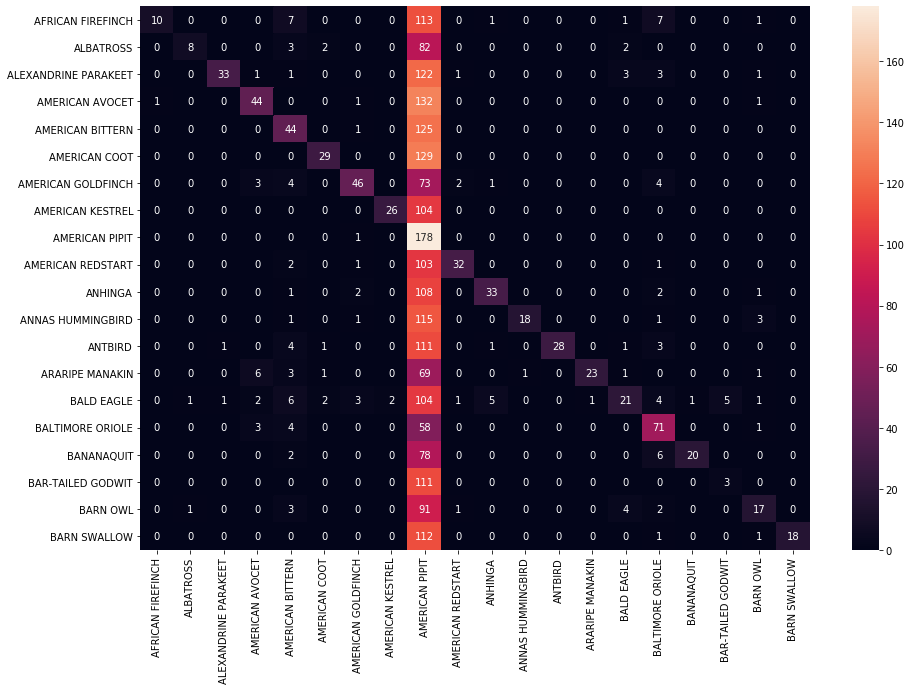

In [29]:
print("accuracy is",round(metrics.accuracy_score(sub_y_train,pred_sub),3))
print("average recall is",round(metrics.recall_score(sub_y_train,pred_sub,average='weighted'),3))
print("average precision is",round(metrics.precision_score(sub_y_train,pred_sub,average='weighted'),3))
conf_mat = pd.DataFrame(metrics.confusion_matrix(sub_y_train,pred_sub),index=np.unique(sub_y_train),\
                        columns=np.unique(sub_y_train))

plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,annot = True,fmt='g');


In [30]:
print(metrics.classification_report(sub_y_train,pred_sub))

                      precision    recall  f1-score   support

   AFRICAN FIREFINCH       0.91      0.07      0.13       140
           ALBATROSS       0.80      0.08      0.15        97
ALEXANDRINE PARAKEET       0.94      0.20      0.33       165
     AMERICAN AVOCET       0.75      0.25      0.37       179
    AMERICAN BITTERN       0.52      0.26      0.35       170
       AMERICAN COOT       0.83      0.18      0.30       158
  AMERICAN GOLDFINCH       0.82      0.35      0.49       133
    AMERICAN KESTREL       0.93      0.20      0.33       130
      AMERICAN PIPIT       0.08      0.99      0.15       179
   AMERICAN REDSTART       0.86      0.23      0.36       139
             ANHINGA       0.80      0.22      0.35       147
   ANNAS HUMMINGBIRD       0.95      0.13      0.23       139
             ANTBIRD       1.00      0.19      0.31       150
     ARARIPE MANAKIN       0.96      0.22      0.36       105
          BALD EAGLE       0.64      0.13      0.22       160
    BAL

That's all fucked up. we can see by the confusion matrix that most of the pictures were classified as **AMERICAN PIPIT**.



## Decision Tree model

In [74]:
dtc = DecisionTreeClassifier(min_samples_split=5)
dtc.fit(sub_X_train_flat,sub_y_train)

pred_sub = dtc.predict(sub_X_train_flat)

accuracy is 0.91
average recall is 0.91
average precision is 0.92


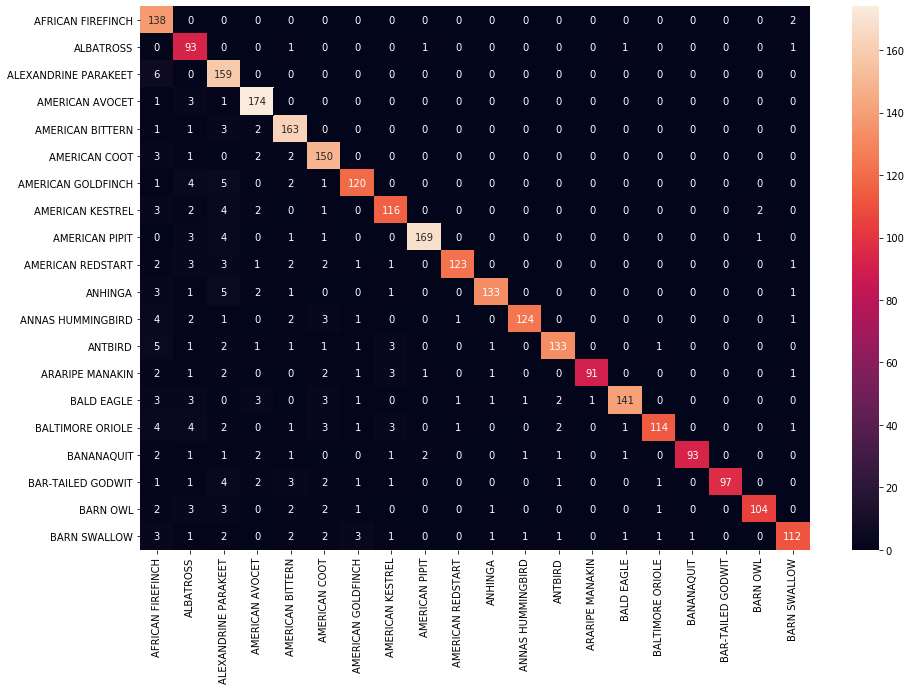

In [75]:
print("accuracy is",round(metrics.accuracy_score(sub_y_train,pred_sub),3))
print("average recall is",round(metrics.recall_score(sub_y_train,pred_sub,average='weighted'),3))
print("average precision is",round(metrics.precision_score(sub_y_train,pred_sub,average='weighted'),3))
conf_mat = pd.DataFrame(metrics.confusion_matrix(sub_y_train,pred_sub),index=np.unique(sub_y_train),\
                        columns=np.unique(sub_y_train))

plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,annot = True,fmt='g');

In [76]:
pred_val = dtc.predict(sub_X_val_flat)

accuracy is 0.31
average recall is 0.31
average precision is 0.319


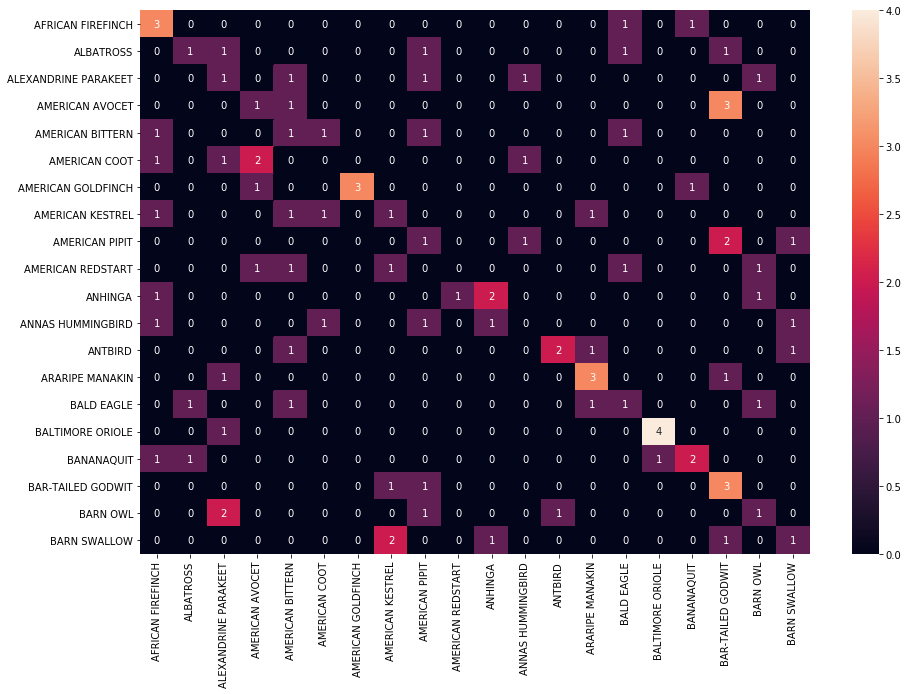

In [77]:
print("accuracy is",round(metrics.accuracy_score(sub_y_val,pred_val),3))
print("average recall is",round(metrics.recall_score(sub_y_val,pred_val,average='weighted'),3))
print("average precision is",round(metrics.precision_score(sub_y_val,pred_val,average='weighted'),3))
conf_mat = pd.DataFrame(metrics.confusion_matrix(sub_y_val,pred_val),index=np.unique(sub_y_val),\
                        columns=np.unique(sub_y_val))

plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,annot = True,fmt='g');

In [78]:
print(metrics.classification_report(sub_y_val,pred_val))

                      precision    recall  f1-score   support

   AFRICAN FIREFINCH       0.33      0.60      0.43         5
           ALBATROSS       0.33      0.20      0.25         5
ALEXANDRINE PARAKEET       0.14      0.20      0.17         5
     AMERICAN AVOCET       0.20      0.20      0.20         5
    AMERICAN BITTERN       0.14      0.20      0.17         5
       AMERICAN COOT       0.00      0.00      0.00         5
  AMERICAN GOLDFINCH       1.00      0.60      0.75         5
    AMERICAN KESTREL       0.20      0.20      0.20         5
      AMERICAN PIPIT       0.14      0.20      0.17         5
   AMERICAN REDSTART       0.00      0.00      0.00         5
             ANHINGA       0.50      0.40      0.44         5
   ANNAS HUMMINGBIRD       0.00      0.00      0.00         5
             ANTBIRD       0.67      0.40      0.50         5
     ARARIPE MANAKIN       0.50      0.60      0.55         5
          BALD EAGLE       0.20      0.20      0.20         5
    BAL

### Let's make a grid search

In [84]:
from sklearn.model_selection import RandomizedSearchCV

dtc = DecisionTreeClassifier()
clf = RandomizedSearchCV(dtc,param_distributions={
            'criterion' : ['gini','entropy'],
            'max_depth' : [3,10,20,30,100],
            'min_samples_leaf' : [1, 3, 5 ,10, 20],
            'max_features' : [3, 8, 12, 15, 20]
            },
            n_iter=10,scoring='accuracy',n_jobs=2)

clf.fit(sub_X_train_flat,sub_y_train)
pd.DataFrame(clf.cv_results_)[['criterion','max_depth','min_samples_leaf','max_features','mean_test_score']]

C:\Users\user\Anaconda3\envs\OR_ITC\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\envs\OR_ITC\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\envs\OR_ITC\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\envs\OR_ITC\lib\site-packages\sklear

KeyError: "['criterion', 'min_samples_leaf', 'max_features', 'max_depth'] not in index"

In [80]:
pred_sub = dtc.predict(sub_X_train_flat)

TypeError: __init__() missing 1 required positional argument: 'param_distributions'

In [79]:
pred_sub = dtc.predict(sub_X_train_flat)

# Building a simple CNN 

## Preparing the data

- convert categories to numeric.
- normalization.

### convert categories to numeric

In [40]:
from keras.utils import to_categorical

train_y_cat = np.array(pd.get_dummies(sub_y))
print("The shape of the train labels is",train_y_cat.shape)
train_y_cat

Using TensorFlow backend.


The shape of the train labels is (581, 4)


array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [41]:
sub_X_val = X_val[:20]
sub_X_val.shape

(20, 224, 224, 3)

In [42]:
val_y_cat = np.array(pd.get_dummies(y_val[:20]))
val_y_cat

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

### Normalization

In [43]:
sub_X = sub_X / 255
sub_X_val = sub_X_val / 255

## Building the network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [45]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      18464     
_________________________________________________________________
flatten (Flatten)            (None, 1548800)           0         
_________________________________________________________________
dense (Dense)                (None, 4)                 6195204   
Total params: 6,215,460
Trainable params: 6,215,460
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(sub_X, train_y_cat, batch_size=128, validation_data=(sub_X_val, val_y_cat), epochs=1) 

Train on 581 samples, validate on 20 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10


In [ ]:
model.history.history